In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
nltk.download('all-nltk')

[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downl

True

In [2]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=806d9c11280af6caa3685f0a944dd0c2024e2ac4085a4142a852ad49b589e614
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import wikipedia
from nltk.stem import PorterStemmer
from gensim.summarization import keywords
stemmer = PorterStemmer()

In [70]:
def bag_of_words(text): 
  #cleaning the texts and creating the corpus             
  ps = PorterStemmer()
  wordnet=WordNetLemmatizer()
  sentences = nltk.word_tokenize(text)
  corpus = []
  for i in range(len(sentences)):
      review = re.sub('[^a-zA-Z]', ' ', sentences[i])
      review = review.lower()
      review = review.split()
      review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
      review = ' '.join(review)
      corpus.append(review)    
  # Creating the Tf-Idf model
  from sklearn.feature_extraction.text import TfidfVectorizer
  cv = TfidfVectorizer()
  X = cv.fit_transform(corpus).toarray()
  return X

In [5]:
#only for testing, nothing else
tes = '''Challenges in natural language processing frequently involve
... speech recognition, natural language understanding, natural language
... generation (frequently from formal, machine-readable logical forms),
... connecting language and machine perception, dialog systems, or some
... combination thereof.'''
lost = list(keywords(tes).split("\n"))
print(lost)

['natural language', 'machine', 'frequently']


In [68]:
#function to extract feature from wikipedia pages of each title 
def features(title):
  wiki = wikipedia.page(title)
  text = wiki.content
  l = list(keywords(text).split("\n"))
  #cleaning the text
  stop = set(stopwords.words('english'))
  stems = [stemmer.stem(i) for i in l if i not in stop]
  key_words = set(stems)
  x = bag_of_words(text)
  return x,key_words


In [69]:
#code to scrap all wikipedia articles of Mathematics topics and storing its links in storage dictionary
from bs4 import BeautifulSoup
import requests
import random
count = 0
#queue is the list of all the links that are the values of the storage keys
queue=[]
#creating a storage dictionary key values as topics and their values as the list of links under that topic 
storage = dict()
feature_vec = dict()
key_w = dict()

# https://www.freecodecamp.org/news/scraping-wikipedia-articles-with-python/
def scrapeWikiArticle(url):
  links_to_scrape = []
  try:
    response = requests.get( url=url,)
    soup = BeautifulSoup(response.content, 'html.parser')
    title = soup.find(id="firstHeading")
    allLinks = soup.find(id="bodyContent").find_all("a")
    #extracting features and keywords from text
    featur,key_word = features(title)
    h=url.split('.org')
    feature_vec[h[1]] = featur
    key_w[h[1]]=key_word
    #appending only the wiki links to the queue
    for link in allLinks:
      try:
         if link['href'].find("/wiki/") == -1: 
           continue
         if "https"  in link['href']:
             continue
         else:
            links_to_scrape.append(link['href'])
            queue.append(link['href'])
      except:
           pass
    
  except:
     pass 
  h=url.split('.org')
  storage[h[1]] = links_to_scrape  	   
scrapeWikiArticle("https://en.wikipedia.org/wiki/Mathematics")
for i in queue:
    if len(i.split("/")) <= 3:
     count +=1
     if count <80:
        scrapeWikiArticle("https://en.wikipedia.org" + i) 
        queue.pop(0) 

print(len(queue))


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that c

43767


In [8]:
storage

{'/wiki/Algebra': ['/wiki/Algebra_over_a_field',
  '/wiki/Algebra_(disambiguation)',
  '/wiki/File:Quadratic_formula.svg',
  '/wiki/File:Quadratic_formula.svg',
  '/wiki/Quadratic_formula',
  '/wiki/Arabic_language',
  '/wiki/Bonesetter',
  '/wiki/Areas_of_mathematics',
  '/wiki/Mathematics',
  '/wiki/Mathematical_symbol',
  '/wiki/Formula',
  '/wiki/Elementary_algebra',
  '/wiki/Variable_(mathematics)',
  '/wiki/Abstract_algebra',
  '/wiki/Education',
  '/wiki/Algebraic_structure',
  '/wiki/Group_(mathematics)',
  '/wiki/Ring_(mathematics)',
  '/wiki/Field_(mathematics)',
  '/wiki/Linear_algebra',
  '/wiki/Linear_equation',
  '/wiki/Linear_mapping',
  '/wiki/Geometry',
  '/wiki/Weather_forecasting',
  '/wiki/Commutative_algebra',
  '/wiki/Galois_theory',
  '/wiki/Algebra_over_a_field',
  '/wiki/Boolean_algebra',
  '/wiki/Boolean_algebra_(structure)',
  '/wiki/File:Mu%E1%B8%A5ammad_ibn_M%C5%ABs%C4%81_al-Khw%C4%81rizm%C4%AB.png',
  '/wiki/File:Mu%E1%B8%A5ammad_ibn_M%C5%ABs%C4%81_al-Khw%

In [9]:
list(storage.keys())[0:10]

['/wiki/Mathematics',
 '/wiki/Mathematics_(disambiguation)',
 '/wiki/File:Nuvola_Math_and_Inf.svg',
 '/wiki/Foundations_of_mathematics',
 '/wiki/Algebra',
 '/wiki/Combinatorics',
 '/wiki/Topology',
 '/wiki/Probability',
 '/wiki/Computational_sciences',
 '/wiki/Operations_research']

In [10]:
feature_vec

{'/wiki/Algebra': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '/wiki/Algebraic_geometry': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '/wiki/Algebraic_logic': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '/wiki/Algebraic_number_theory': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,

In [11]:
list(feature_vec.keys())[0:10]

['/wiki/Mathematics',
 '/wiki/Foundations_of_mathematics',
 '/wiki/Algebra',
 '/wiki/Combinatorics',
 '/wiki/Topology',
 '/wiki/Computational_sciences',
 '/wiki/Operations_research',
 '/wiki/Computational_biology',
 '/wiki/Lists_of_mathematicians',
 '/wiki/Lists_of_mathematics_topics']

In [72]:
# importing the wiki math article- sheet 1 given by anirban sir and creating a graph

import pandas as pd
from statistics import mode
#Import the CSV file and get it's link and label
file = pd.read_csv("Wiki Math Articles - Sheet1.csv")
file = file[['Link' , 'Label']]
file = file.dropna() #removing the missing values

In [73]:
rv =list(file['Link'])

In [74]:
#just for testing
s  = nx.Graph()
for i in storage:
  edges = storage[i]
  for edge in edges:
    s.add_edge(i,edge)

In [17]:
nx.set_node_attributes(s, feature_vec, "vector")
nx.set_node_attributes(s, key_w, "key_words")

In [75]:
s.nodes()
# the nodes will be the /wiki/title

NodeView(('/wiki/Mathematics', '/wiki/Mathematics_(disambiguation)', '/wiki/Math_(disambiguation)', '/wiki/File:Nuvola_Math_and_Inf.svg', '/wiki/Pure_mathematics', '/wiki/Foundations_of_mathematics', '/wiki/Mathematical_analysis', '/wiki/Algebra', '/wiki/Number_theory', '/wiki/Combinatorics', '/wiki/Geometry', '/wiki/Topology', '/wiki/Applied_mathematics', '/wiki/Probability', '/wiki/Statistics', '/wiki/Computational_sciences', '/wiki/Mathematical_physics', '/wiki/Operations_research', '/wiki/Mathematical_optimization', '/wiki/Computational_biology', '/wiki/Computational_linguistics', '/wiki/Wikipedia:WikiProject_Mathematics/List_of_mathematics_articles_(0%E2%80%939)', '/wiki/Wikipedia:WikiProject_Mathematics/List_of_mathematics_articles_(A)', '/wiki/Wikipedia:WikiProject_Mathematics/List_of_mathematics_articles_(B)', '/wiki/Wikipedia:WikiProject_Mathematics/List_of_mathematics_articles_(C)', '/wiki/Wikipedia:WikiProject_Mathematics/List_of_mathematics_articles_(D)', '/wiki/Wikipedia:W

In [76]:
rv =list(file['Link'])

In [77]:
rvl=list(file['Label'])

In [78]:
lit1=[]
for i in storage.values():
  for j in i:
    lit1.append(j)
lit = []
label1=[]
for i in range(len(rv)):
  if rv[i] in lit1:
    lit.append(rv[i]) 
    label1.append(rvl[i])  
    

In [79]:
import pandas as pd
d={"Links":lit,"Labels":label1}
df = pd.DataFrame(d)
df.head(5)

,Links,Labels


In [80]:
df

,Links,Labels


In [81]:
import pandas as pd
from statistics import mode
#importing the output file sent by Anirban sir and extracting its labels anmd links
work=pd.read_csv("Output.csv")
work=work[['Link', 'Label']]
#removing empty nodes
work=work.dropna()

#There are multiple links with different labels so cleaning them by updating labels of links with most occuring label
for i in range(len(work)):
  labels=list()
  for j in range(len(work)):
    try:
      try:
        l1=work['Link'][i]
      except:
        pass
      try:
        l2=work['Link'][j]
      except:
        pass
      #if the labels are same
      if(l1==l2):
        try:
          labels.append(work['Label'][j])
        except:
          pass
    except ValueError:
      pass
  temp=labels
  cnt=0
  link_label=temp[0]
  for j in range(len(temp)):
    frequency=temp.count(temp[j])
    #replacing the labels with the most occuring label
    if(frequency>cnt):
      cnt=frequency
      link_label=temp[j]
  label=link_label
  for j in range(len(work)):
    try:
      l1=work['Link'][i]
    except:
      pass
    try:
      l2=work['Link'][j]
    except:
      pass
    #giving the most occuring label as the final label to that link
    if(l1==l2):
      try:
        work[j]['Link'] = label
      except:
        pass
#removing duplicates
work=work.drop_duplicates()



In [25]:
work

,Link,Label
0,https://en.wikipedia.org/wiki/Absolute_value,1
1,https://en.wikipedia.org/wiki/Addition_theorem,1
2,https://en.wikipedia.org/wiki/Adjugate_matrix,2
3,https://en.wikipedia.org/wiki/Algebra_of_sets,2
4,https://en.wikipedia.org/wiki/Algorithm,2
...,...,...
459,https://en.wikipedia.org/wiki/Wald%E2%80%93Wol...,1
460,https://en.wikipedia.org/wiki/Weibull_distribu...,2
461,https://en.wikipedia.org/wiki/Weighted_arithme...,1
462,https://en.wikipedia.org/wiki/Wiener%E2%80%93K...,3


In [82]:
#assuming first 10 links as root nodes of the graph and appending it to the root list
n=10
root=list()
#difficulty level dictionary
level=dict()
for i in range(n):
  node=work['Link'][i]
  cur_label=work['Label'][i]
  level[node]=cur_label
  root.append(node)
print(root)

['https://en.wikipedia.org/wiki/Absolute_value', 'https://en.wikipedia.org/wiki/Addition_theorem', 'https://en.wikipedia.org/wiki/Adjugate_matrix', 'https://en.wikipedia.org/wiki/Algebra_of_sets', 'https://en.wikipedia.org/wiki/Algorithm', 'https://en.wikipedia.org/wiki/Altitude_(triangle)', 'https://en.wikipedia.org/wiki/Angle_bisector_theorem', 'https://en.wikipedia.org/wiki/Antiderivative', 'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)', 'https://en.wikipedia.org/wiki/Arithmetic_mean']


In [83]:
#returning the dictionary of difficulty level
level

{'https://en.wikipedia.org/wiki/Absolute_value': 1,
 'https://en.wikipedia.org/wiki/Addition_theorem': 1,
 'https://en.wikipedia.org/wiki/Adjugate_matrix': 2,
 'https://en.wikipedia.org/wiki/Algebra_of_sets': 2,
 'https://en.wikipedia.org/wiki/Algorithm': 2,
 'https://en.wikipedia.org/wiki/Altitude_(triangle)': 2,
 'https://en.wikipedia.org/wiki/Angle_bisector_theorem': 1,
 'https://en.wikipedia.org/wiki/Antiderivative': 2,
 'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)': 3,
 'https://en.wikipedia.org/wiki/Arithmetic_mean': 1}

In [85]:
#making wikipedia graph by connecting children links with their root links by visiting the root links
import requests
from bs4 import BeautifulSoup
l=list()
for i in range(len(root)):
  l.append(root[i])
#denoting the visited nodes as explored list
explored=list()
#parent node dictionary having keys as all the links and values as their parent/root links
parent_node=dict()
while(len(l)!=0):
  #creating a temporary root
  r=l.pop(0)
  #visiting the temporary root links and scraping it to extract all the links starting with wiki
  url=requests.get(r)
  html_page=BeautifulSoup(url.content, 'html.parser')
  urls=html_page.find_all('a')
  #children node list 
  children=list()
  for link in urls:
    t=link.get('href')
    #checking if the scraped links starts with /wiki/
    if t is not None and t.startswith('/wiki/') and ":" not in t:
      res='https://en.wikipedia.org' + t
      occur=False
      for j in range(len(children)):
        if(children[j]==res):
          occur=True
          break
      if(occur==False):
        #if the links of scraped url didin't get found then append it to the list of children nodes of that root
        children.append(res)
        if(len(children)==10):
          break
    for k in range(len(children)):
      #checking if the children nodes already visited or not. If not then append that link to visited/explored list 
      if(children[k] not in explored):
        explored.append(children[k])
        parent_node[children[k]]=r
  if(len(l)>1000):
    break


In [86]:
#creating the graph or the dictionary having parent_node as their keys and their values as their child node links
graph={}
for child in parent_node:
  p=parent_node[child]
  if(p not in graph):
    graph[p]=list()
  graph[p].append(child)
print(graph)

{'https://en.wikipedia.org/wiki/Absolute_value': ['https://en.wikipedia.org/wiki/Absolute_value_(disambiguation)', 'https://en.wikipedia.org/wiki/Graph_of_a_function', 'https://en.wikipedia.org/wiki/Mathematics', 'https://en.wikipedia.org/wiki/Real_number', 'https://en.wikipedia.org/wiki/Non-negative', 'https://en.wikipedia.org/wiki/Sign_(mathematics)', 'https://en.wikipedia.org/wiki/Positive_number', 'https://en.wikipedia.org/wiki/Negative_number', 'https://en.wikipedia.org/wiki/Distance'], 'https://en.wikipedia.org/wiki/Addition_theorem': ['https://en.wikipedia.org/wiki/Angle_addition_formulas', 'https://en.wikipedia.org/wiki/Exponential_function', 'https://en.wikipedia.org/wiki/Function_(mathematics)', 'https://en.wikipedia.org/wiki/Trigonometric_functions', 'https://en.wikipedia.org/wiki/Algebraic_function', 'https://en.wikipedia.org/wiki/Unit_circle', 'https://en.wikipedia.org/wiki/Elliptic_function', 'https://en.wikipedia.org/wiki/Polynomial'], 'https://en.wikipedia.org/wiki/Adju

In [87]:
#creating the graph of the graph dictionary by visualizing it
import matplotlib.pyplot as plt
import networkx as nx
class GraphVisualization:
  def __init__(self):
    #edge_set is a list of all edge sets in graph
    self.edge_set=list()
  #function to add an edge between 2 vertices and append it to the edge_set list
  def add_edge(self, x, y):
    self.edge_set.append([x, y])
  #function to visualize the graph by adding edges from edge_set to the graph and drawing it using nx.draw_networkx
  def visualize(self):
    G = nx.Graph()
    G.add_edges_from(self.edge_set)
    nx.draw_networkx(G)
    plt.rcParams['figure.figsize']=[50, 50]
    plt.show()
  #function to extract the graph
  def extract_graph(self):
    G=nx.Graph()
    G.add_edges_from(self.edge_set)
    return G
Graph=GraphVisualization()


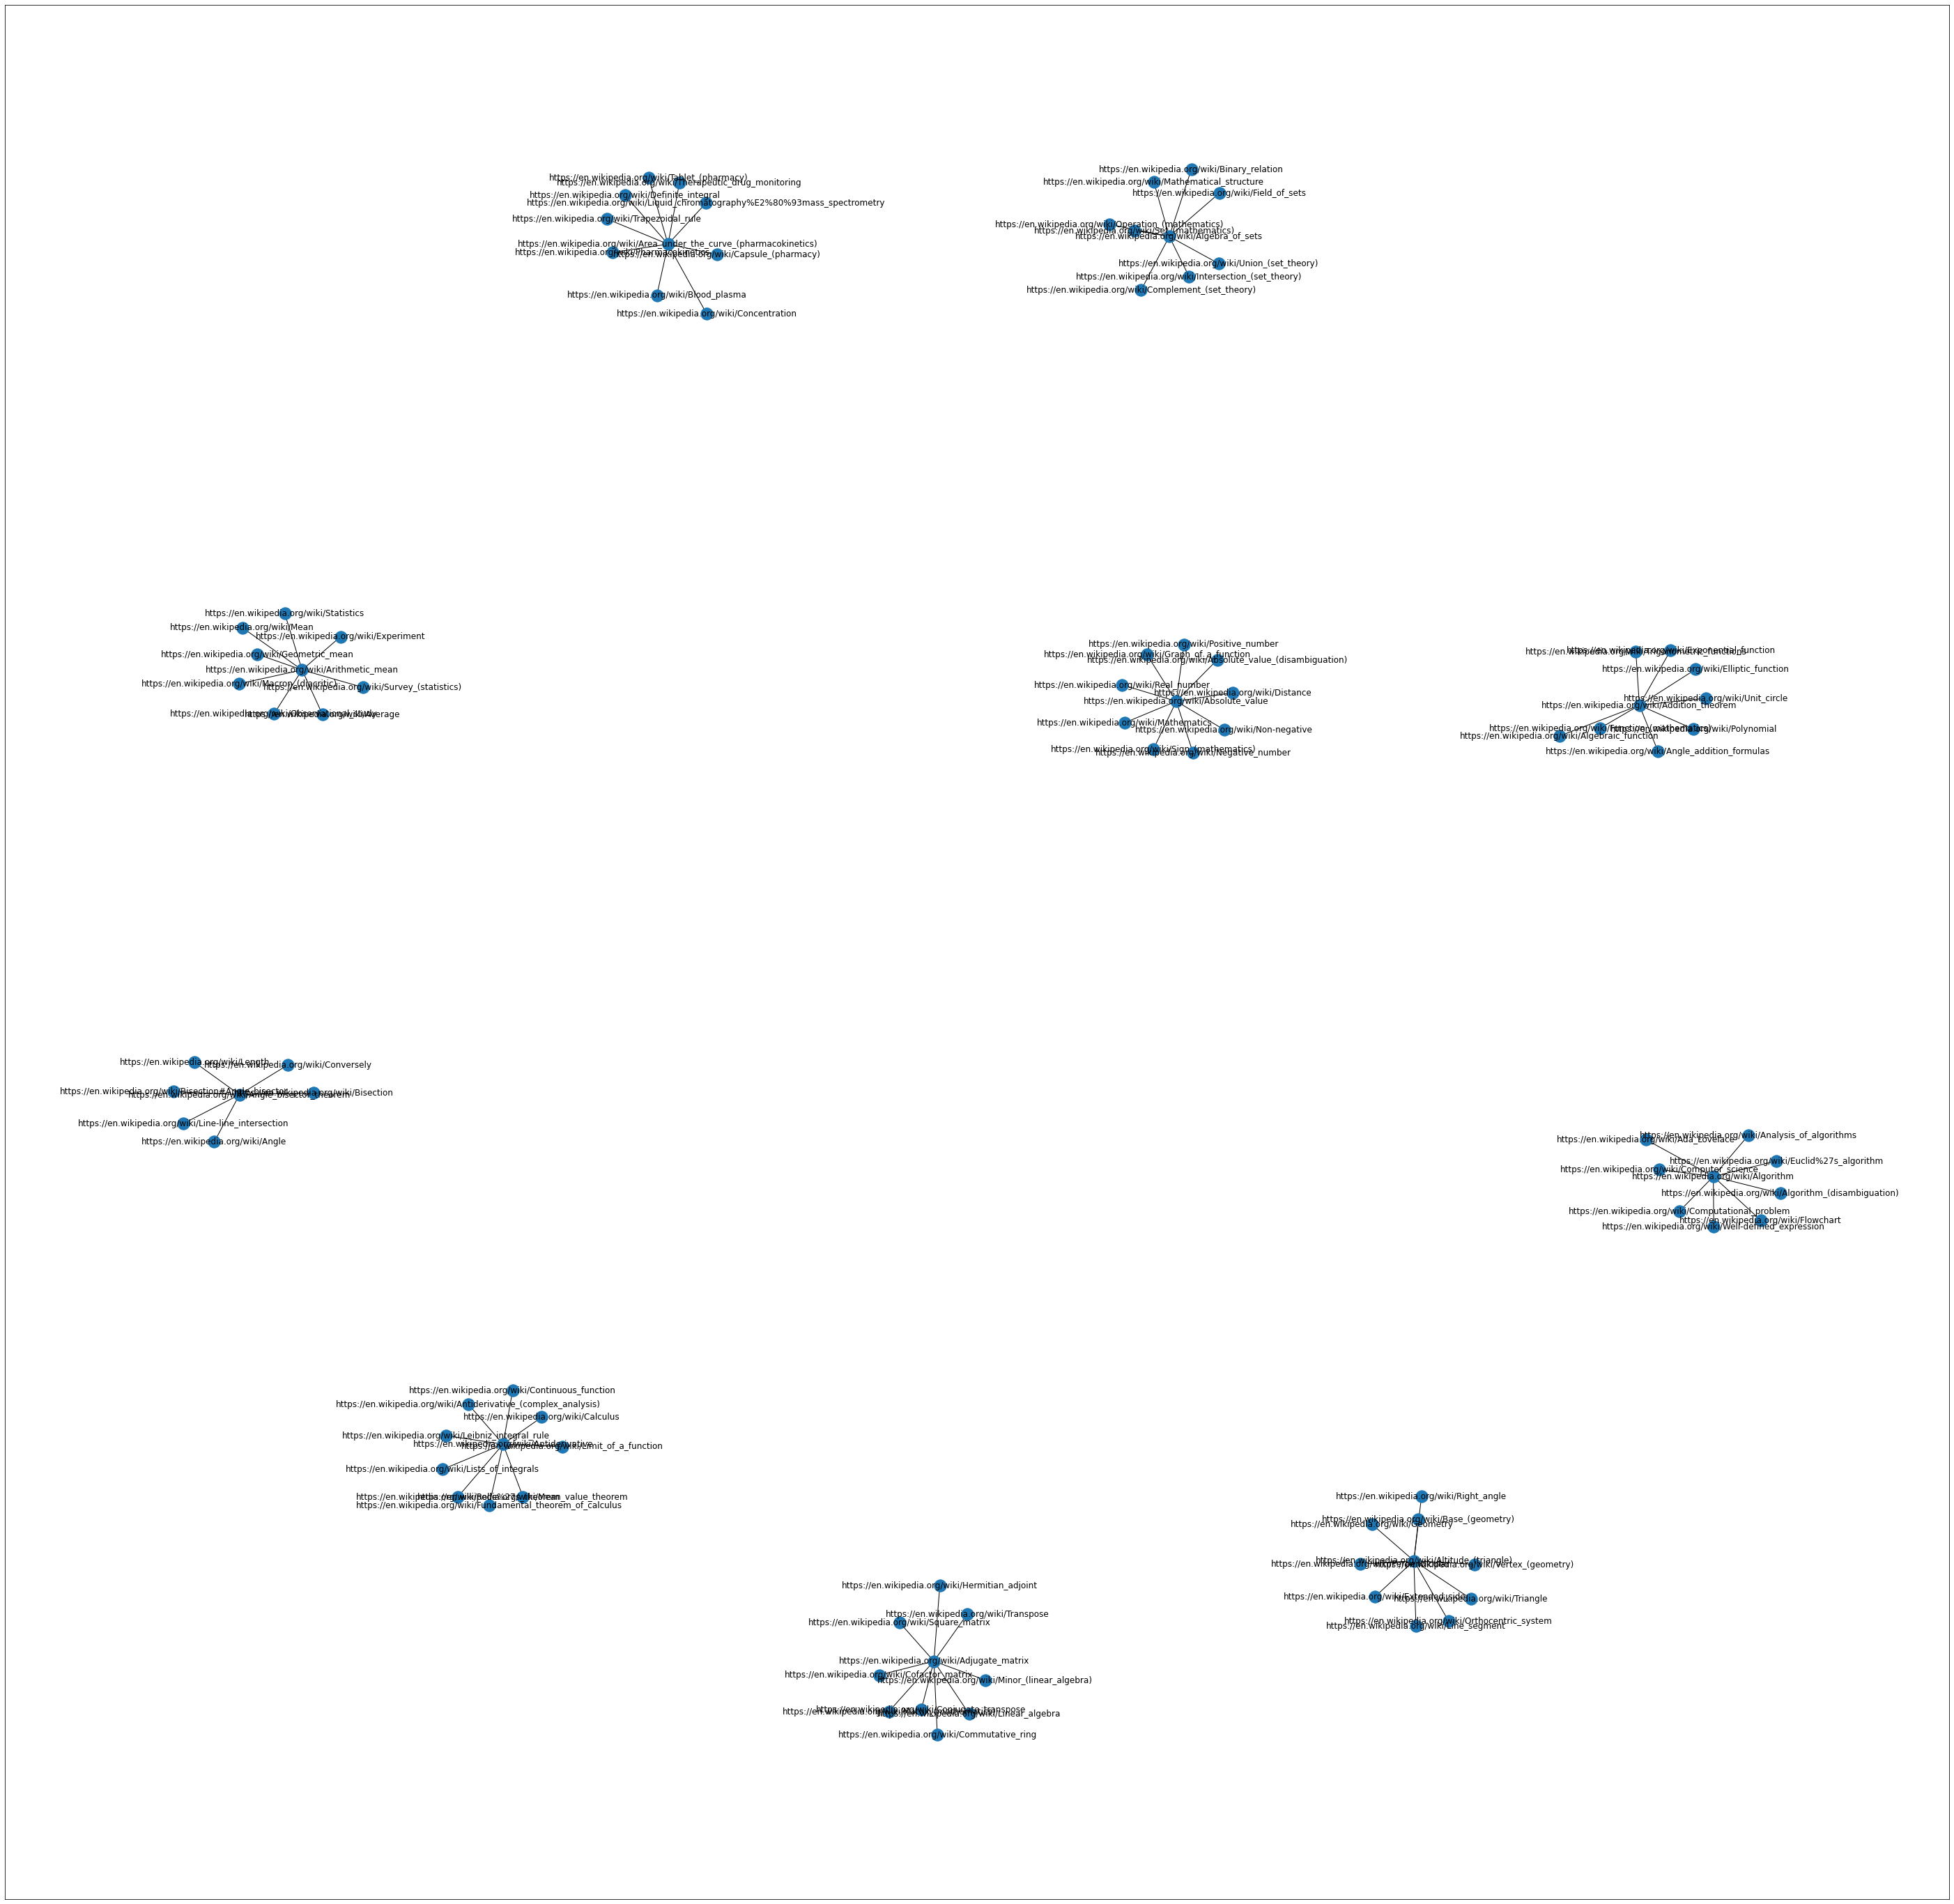

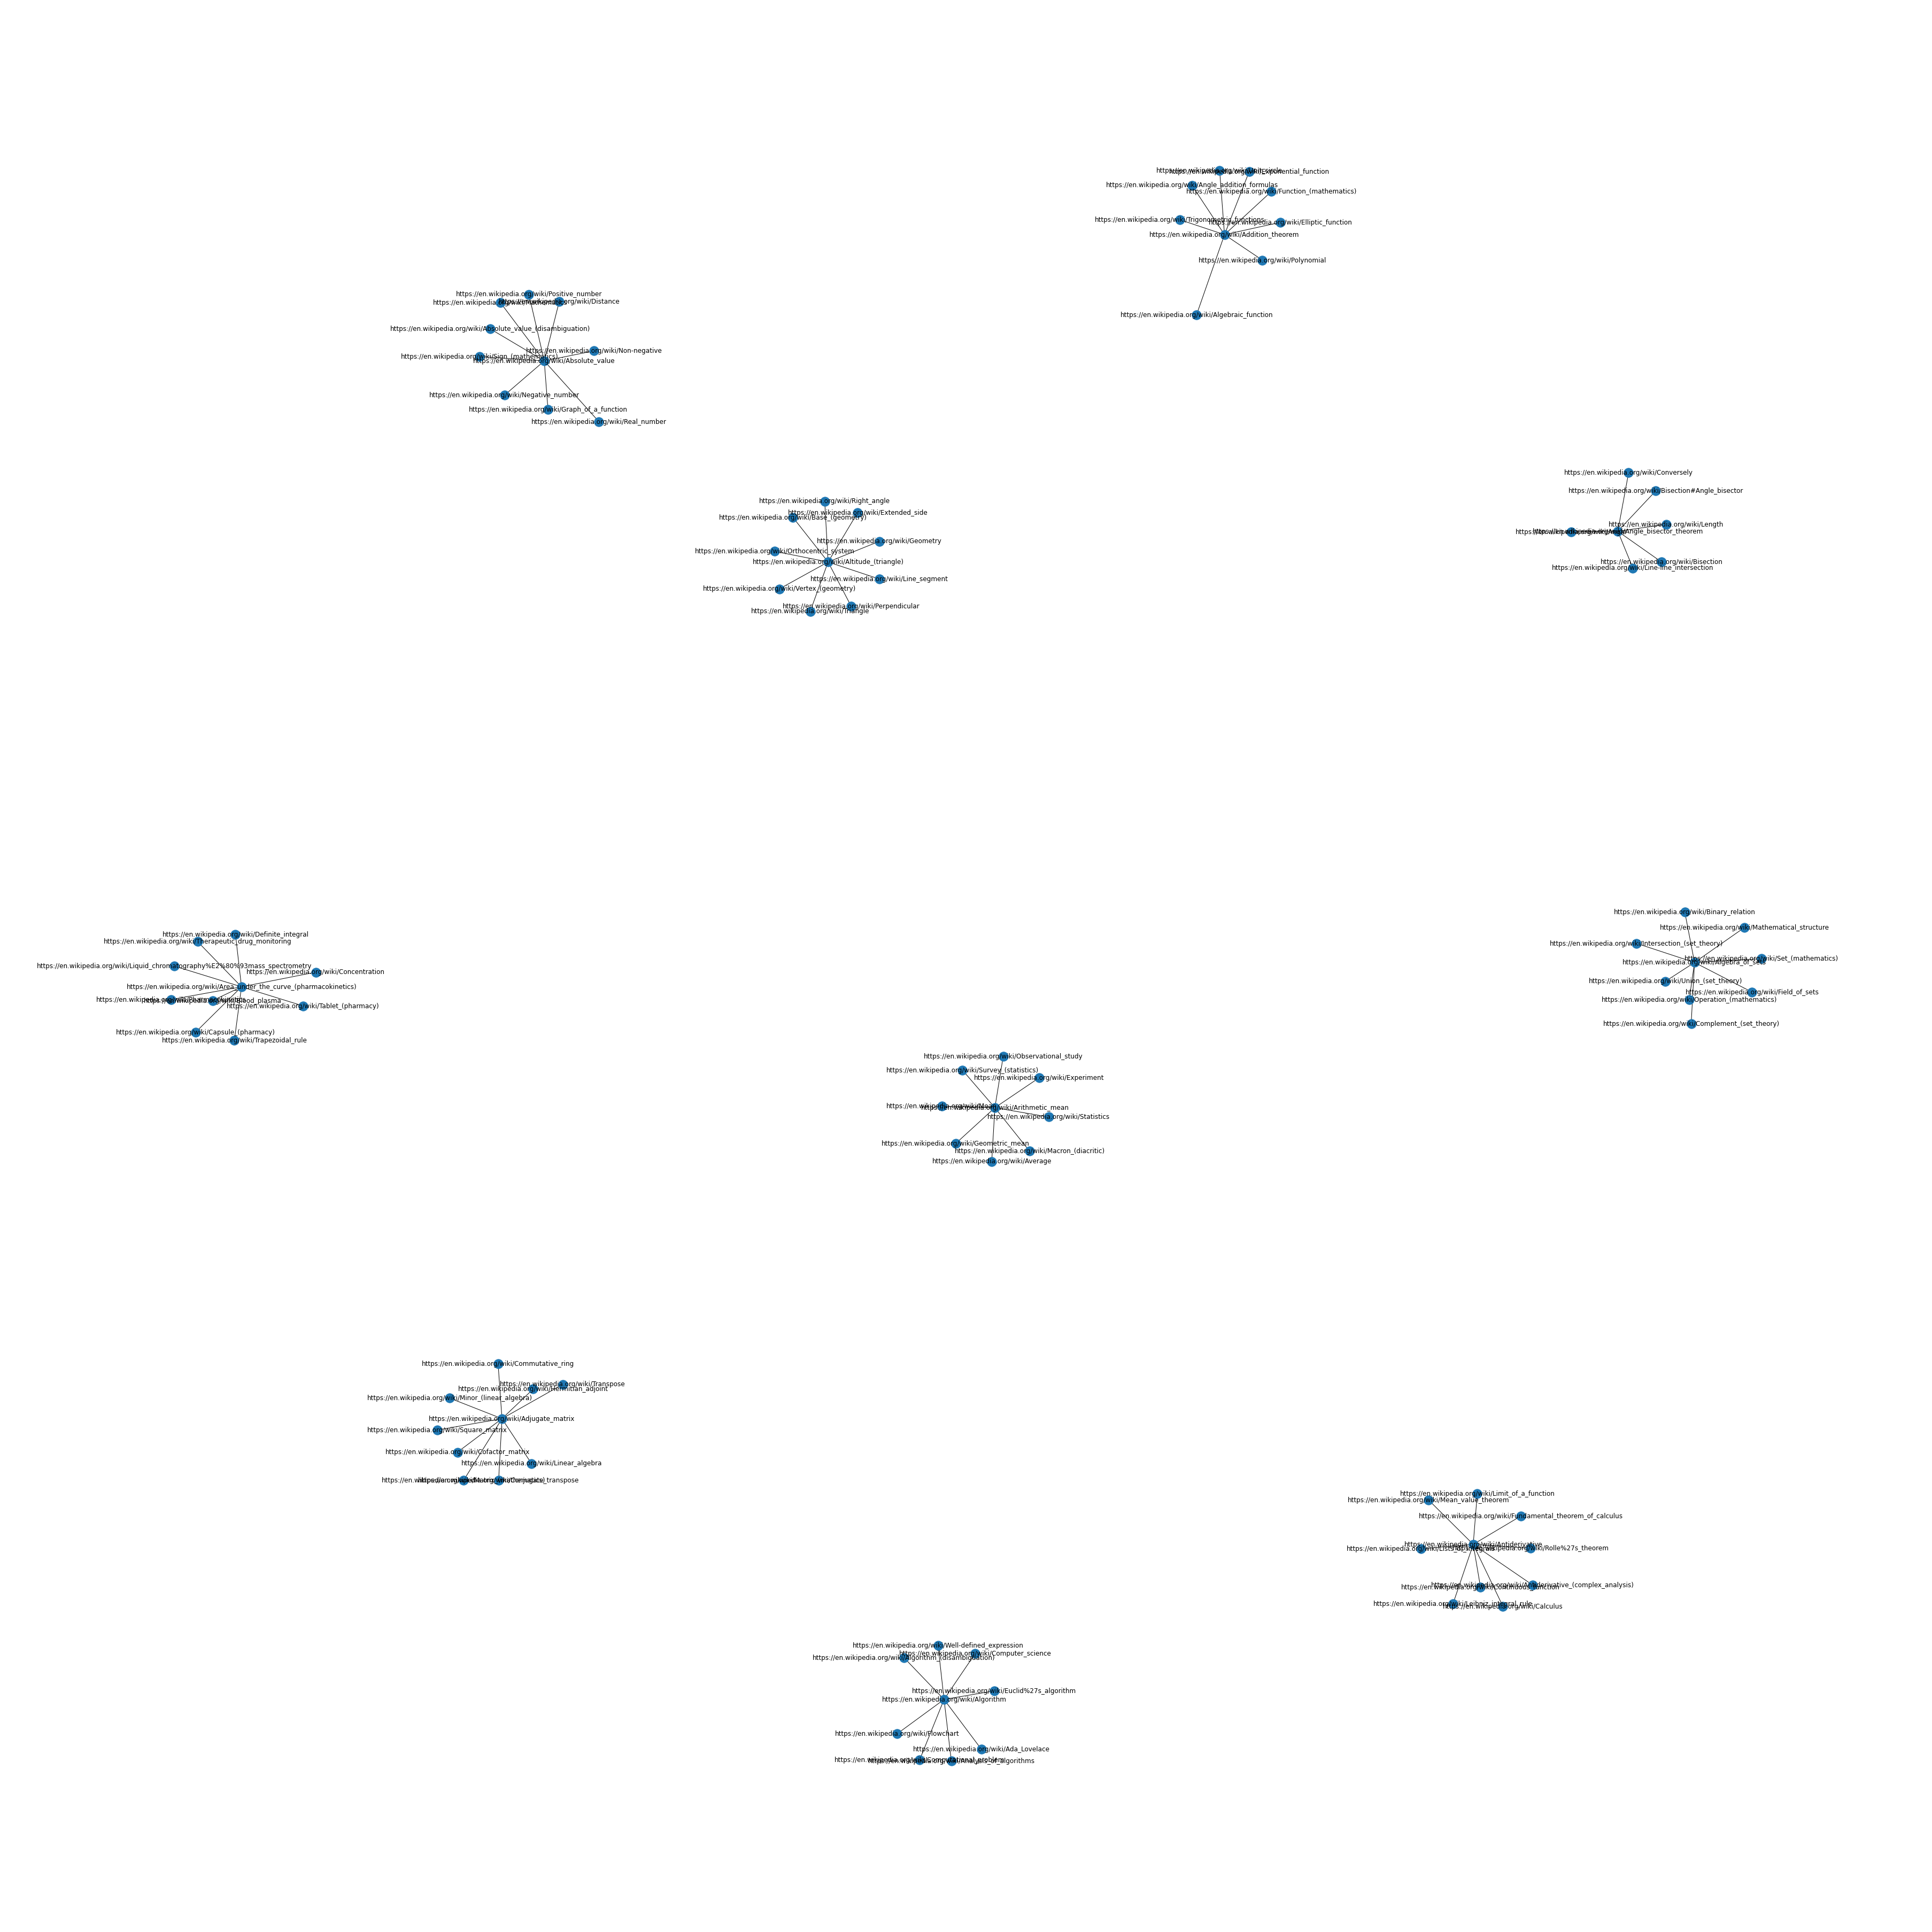

In [88]:
#adding edges between the nodes- parent and children
for i in graph:
  nodes=graph[i]
  for edge in nodes:
    Graph.add_edge(i,edge)
Graph.visualize()
#adding edges between the parent and their children nodes
g=nx.Graph()
for i in graph:
  nodes=graph[i]
  for edge in nodes:
    g.add_edge(i,edge)
#drawing the graph with their labels
nx.draw(g, with_labels=True)

In [89]:
#degree centrality metrics of the graph
nx.degree_centrality(g)

{'https://en.wikipedia.org/wiki/Absolute_value': 0.09782608695652173,
 'https://en.wikipedia.org/wiki/Absolute_value_(disambiguation)': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Ada_Lovelace': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Addition_theorem': 0.08695652173913043,
 'https://en.wikipedia.org/wiki/Adjugate_matrix': 0.09782608695652173,
 'https://en.wikipedia.org/wiki/Algebra_of_sets': 0.08695652173913043,
 'https://en.wikipedia.org/wiki/Algebraic_function': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Algorithm': 0.08695652173913043,
 'https://en.wikipedia.org/wiki/Algorithm_(disambiguation)': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Altitude_(triangle)': 0.09782608695652173,
 'https://en.wikipedia.org/wiki/Analysis_of_algorithms': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Angle': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Angle_addition_formulas': 0.010869565217391304,
 'https://en.wikipedia.org/wiki/Angle_bi

In [90]:
#betweenness centrality metrics of the graph
nx.betweenness_centrality(g)

{'https://en.wikipedia.org/wiki/Absolute_value': 0.008600095556617296,
 'https://en.wikipedia.org/wiki/Absolute_value_(disambiguation)': 0.0,
 'https://en.wikipedia.org/wiki/Ada_Lovelace': 0.0,
 'https://en.wikipedia.org/wiki/Addition_theorem': 0.006688963210702341,
 'https://en.wikipedia.org/wiki/Adjugate_matrix': 0.008600095556617296,
 'https://en.wikipedia.org/wiki/Algebra_of_sets': 0.006688963210702341,
 'https://en.wikipedia.org/wiki/Algebraic_function': 0.0,
 'https://en.wikipedia.org/wiki/Algorithm': 0.006688963210702341,
 'https://en.wikipedia.org/wiki/Algorithm_(disambiguation)': 0.0,
 'https://en.wikipedia.org/wiki/Altitude_(triangle)': 0.008600095556617296,
 'https://en.wikipedia.org/wiki/Analysis_of_algorithms': 0.0,
 'https://en.wikipedia.org/wiki/Angle': 0.0,
 'https://en.wikipedia.org/wiki/Angle_addition_formulas': 0.0,
 'https://en.wikipedia.org/wiki/Angle_bisector_theorem': 0.0035833731485905396,
 'https://en.wikipedia.org/wiki/Antiderivative': 0.008600095556617296,
 '

In [91]:
#clustering coefficients of the nodes of the graph
nx.clustering(g)

{'https://en.wikipedia.org/wiki/Absolute_value': 0,
 'https://en.wikipedia.org/wiki/Absolute_value_(disambiguation)': 0,
 'https://en.wikipedia.org/wiki/Ada_Lovelace': 0,
 'https://en.wikipedia.org/wiki/Addition_theorem': 0,
 'https://en.wikipedia.org/wiki/Adjugate_matrix': 0,
 'https://en.wikipedia.org/wiki/Algebra_of_sets': 0,
 'https://en.wikipedia.org/wiki/Algebraic_function': 0,
 'https://en.wikipedia.org/wiki/Algorithm': 0,
 'https://en.wikipedia.org/wiki/Algorithm_(disambiguation)': 0,
 'https://en.wikipedia.org/wiki/Altitude_(triangle)': 0,
 'https://en.wikipedia.org/wiki/Analysis_of_algorithms': 0,
 'https://en.wikipedia.org/wiki/Angle': 0,
 'https://en.wikipedia.org/wiki/Angle_addition_formulas': 0,
 'https://en.wikipedia.org/wiki/Angle_bisector_theorem': 0,
 'https://en.wikipedia.org/wiki/Antiderivative': 0,
 'https://en.wikipedia.org/wiki/Antiderivative_(complex_analysis)': 0,
 'https://en.wikipedia.org/wiki/Area_under_the_curve_(pharmacokinetics)': 0,
 'https://en.wikipedi

In [43]:
pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=8aec72a803c820d29e6dab9f7dea2cbd2f4c1cdaa84dfb598fa25650819cac0b
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [92]:
#extracting node embeddings of graph by using node2vec
import networkx as nx
from node2vec import Node2Vec
#precomputing probabilities and generating random walks where walk_length is number of nodes in each walk, num_walks is number of walks per node and workers are the number of workers for parallel execution 
node2vec=Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
#embedding nodes and creating a model
model = node2vec.fit(window=10, min_count=1, batch_words=4)
#extracting the node-embedding vectors of the graph
node_embeddings=model.wv.vectors
#saving node-embeddings and model in node_embeddings.emb and node_embeddings.model
model.wv.save_word2vec_format("node_embeddings.emb")
model.save("node_embeddings.model")


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]

In [93]:
import numpy as np
print(node_embeddings)
np.shape(node_embeddings)


[[ 0.17357868  0.38360164 -0.9569966  ... -0.37674773  0.43995947
   0.07892695]
 [ 0.00997806  1.0355697  -0.4599158  ...  0.16752484 -0.14029706
  -0.48936805]
 [ 0.35416752  0.42554474 -0.34023413 ...  0.5043231   0.53581387
   0.31995285]
 ...
 [ 0.21188873  0.66054857 -0.5306919  ...  0.12645313  0.4791593
   0.33623186]
 [-0.02634783  1.0025989  -0.46466473 ...  0.23828553 -0.11353388
  -0.5306254 ]
 [ 0.58710134  0.04727996 -0.38450304 ...  0.11673174  0.22584775
  -0.24199338]]


(93, 64)